In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Main_uploads/loan_data.csv')

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [ ]:
df['pub.rec'].value_counts()

0    9019
1     533
2      19
3       5
4       1
5       1
Name: pub.rec, dtype: int64

In [ ]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [ ]:
df_1 = pd.get_dummies(df['purpose'])

In [ ]:
df_1

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
9573,1,0,0,0,0,0,0
9574,1,0,0,0,0,0,0
9575,0,0,1,0,0,0,0
9576,0,0,0,0,1,0,0


In [ ]:
df_2 = df.join(df_1).drop('purpose',axis=1)

In [ ]:
df_2

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


<Figure size 1000x800 with 0 Axes>

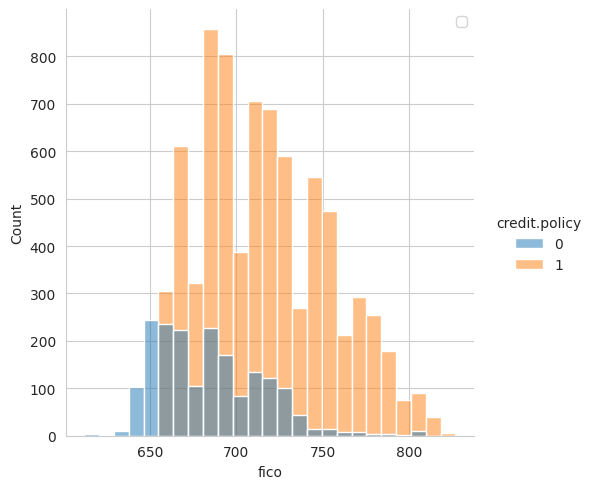

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))

sns.displot(data=df,x='fico',hue='credit.policy',bins=25,alpha=.5)
plt.legend()

Text(0.5, 0, 'Fico')

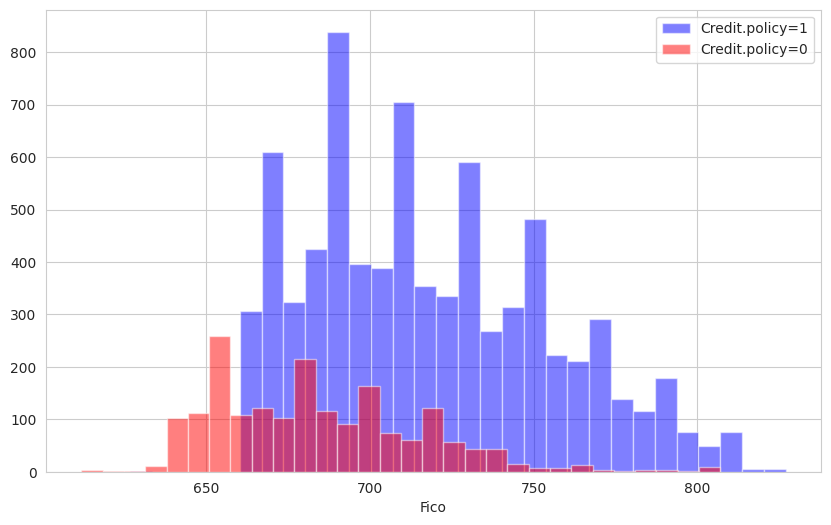

In [ ]:
plt.figure(figsize=(10,6))

df[df['credit.policy'] == 1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.policy=1')
df[df['credit.policy'] == 0]['fico'].hist(alpha=0.5,color='red', bins=30,label='Credit.policy=0')

plt.legend()
plt.xlabel('Fico')

Text(0.5, 0, 'Fico')

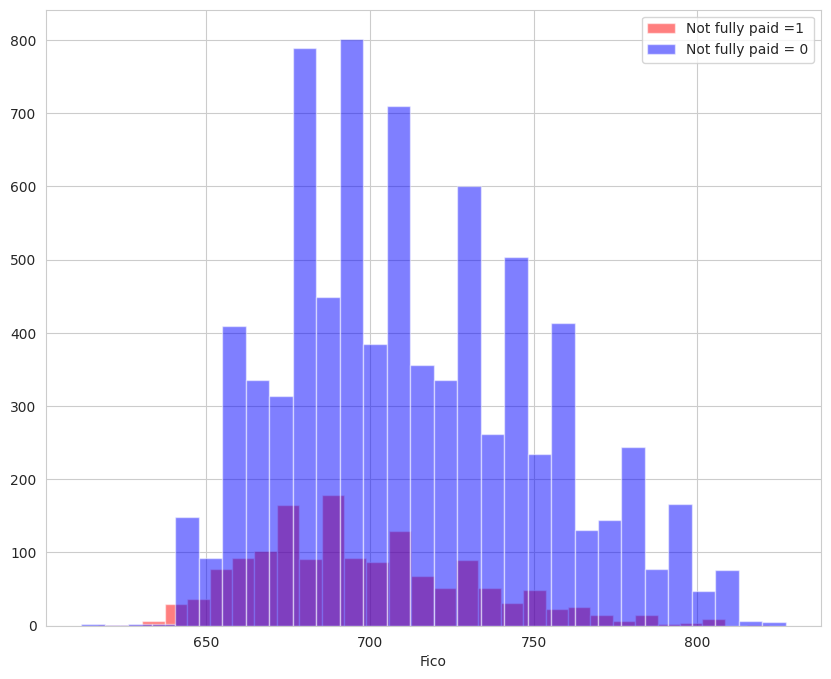

In [ ]:
plt.figure(figsize=(10,8))
df[df['not.fully.paid'] == 1]['fico'].hist(alpha=.5,color='red',bins=30,label='Not fully paid =1')
df[df['not.fully.paid'] == 0]['fico'].hist(alpha=.5,color='blue',bins=30,label='Not fully paid = 0')

plt.legend()
plt.xlabel('Fico')

In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

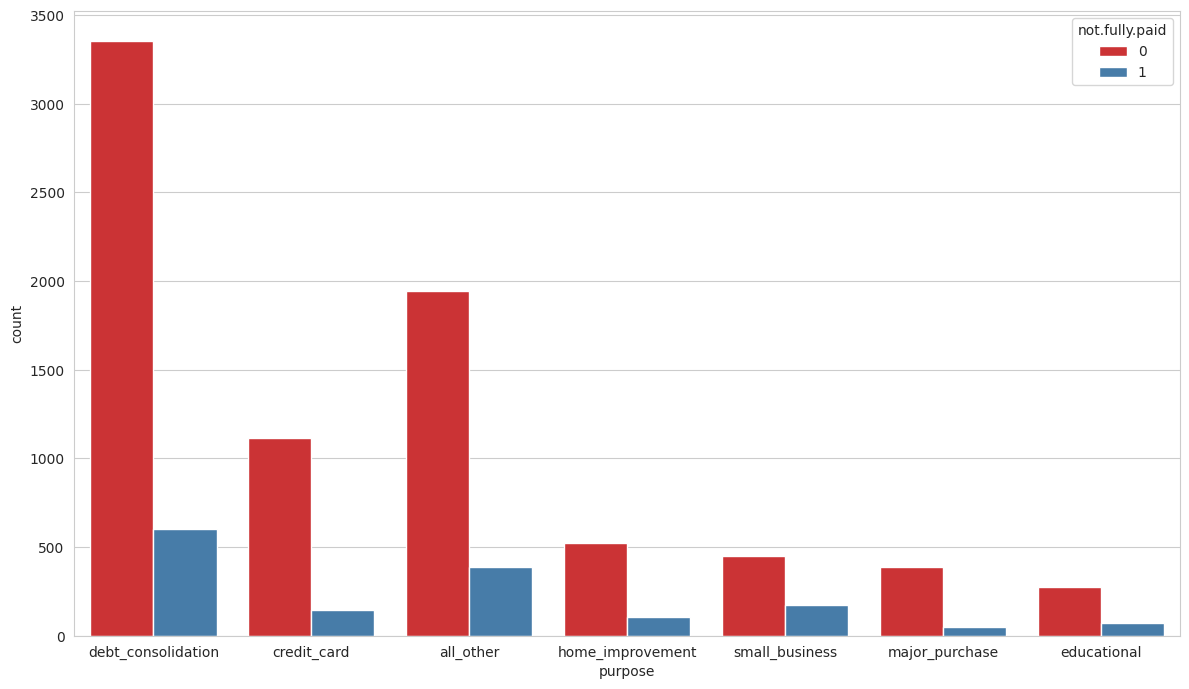

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='purpose',hue='not.fully.paid',palette='Set1')
plt.tight_layout()

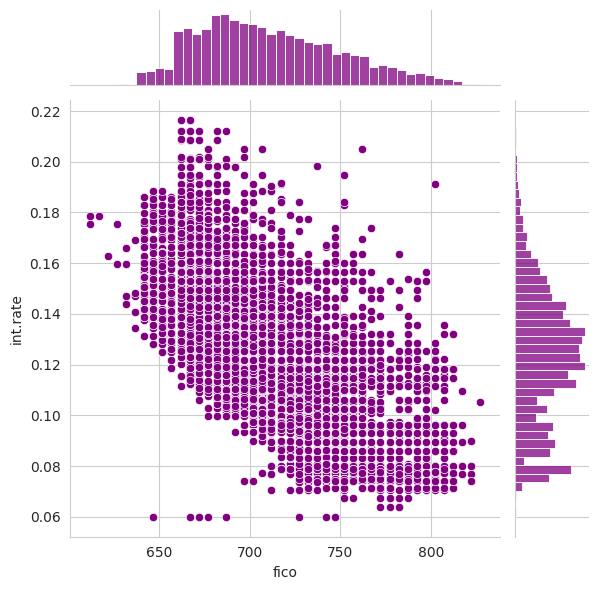

In [ ]:
sns.jointplot(data=df,x='fico',y='int.rate',color='purple')

<Figure size 1100x700 with 0 Axes>

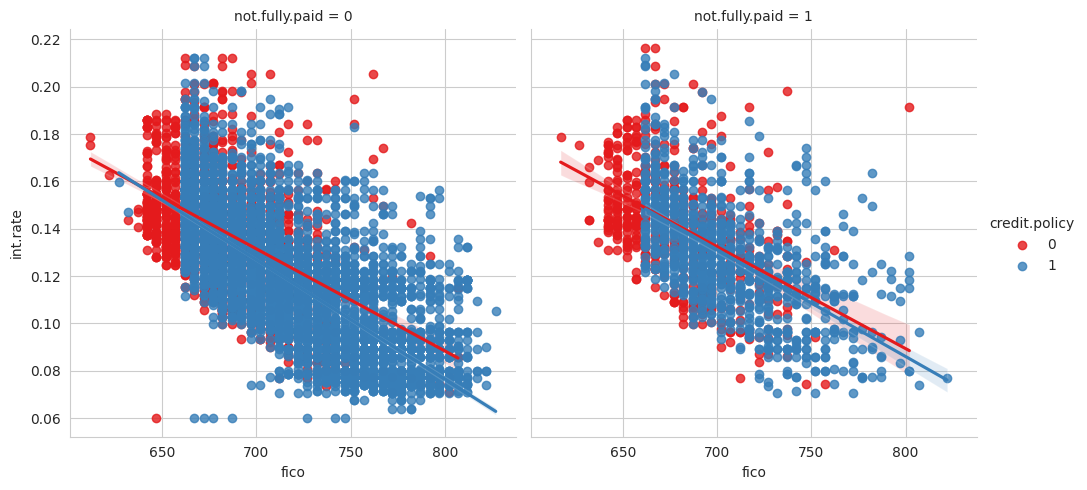

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(data=df,col='not.fully.paid',x='fico',y='int.rate',
           hue='credit.policy',palette='Set1')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit.policy       9578 non-null   int64  
 1   int.rate            9578 non-null   float64
 2   installment         9578 non-null   float64
 3   log.annual.inc      9578 non-null   float64
 4   dti                 9578 non-null   float64
 5   fico                9578 non-null   int64  
 6   days.with.cr.line   9578 non-null   float64
 7   revol.bal           9578 non-null   int64  
 8   revol.util          9578 non-null   float64
 9   inq.last.6mths      9578 non-null   int64  
 10  delinq.2yrs         9578 non-null   int64  
 11  pub.rec             9578 non-null   int64  
 12  not.fully.paid      9578 non-null   int64  
 13  all_other           9578 non-null   uint8  
 14  credit_card         9578 non-null   uint8  
 15  debt_consolidation  9578 non-null   uint8  
 16  educat

In [ ]:
X = df_2.drop('credit.policy',axis=1)
y = df_2['credit.policy']

from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25)

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       1.00      0.99      0.99      1895

    accuracy                           0.99      2395
   macro avg       0.99      0.99      0.99      2395
weighted avg       0.99      0.99      0.99      2395



[[ 494    6]
 [  13 1882]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       500
           1       0.99      1.00      0.99      1895

    accuracy                           0.99      2395
   macro avg       0.99      0.98      0.98      2395
weighted avg       0.99      0.99      0.99      2395



[[ 478   22]
 [   6 1889]]


In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param = {'n_estimators':list(range(50,200))}
rs = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param)

rs.fit(X_train,y_train)

pred_1 = rs.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_1))
print('\n')
print(confusion_matrix(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       500
           1       0.99      1.00      0.99      1895

    accuracy                           0.99      2395
   macro avg       0.99      0.97      0.98      2395
weighted avg       0.99      0.99      0.99      2395



[[ 476   24]
 [   5 1890]]
